In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [16]:
#Load the dataset
df = pd.read_csv('Sales.csv')

print("===DATA===")
df.head(10)

===DATA===


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,4-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,1-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,7-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
5,Van Tuxwell,India,Smooth Sliky Salty,6-Jun-22,"$5,376",38
6,Oby Sorrel,UK,99% Dark & Pure,25-Jan-22,"$13,685",176
7,Gunar Cockshoot,Australia,After Nines,24-Mar-22,"$3,080",73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,20-Apr-22,"$3,990",59
9,Brien Boise,Australia,99% Dark & Pure,4-Jul-22,"$2,835",102


In [19]:
df.shape

(1094, 6)

In [20]:
df.columns.tolist()

['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped']

In [21]:
df[['Country','Boxes Shipped']]

,Country,Boxes Shipped
0,UK,180
1,India,94
2,India,91
3,Australia,342
4,UK,184
...,...,...
1089,Australia,323
1090,USA,119
1091,Canada,217
1092,India,384


In [22]:
print("DATASET INFO")
df.info()

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [24]:
print("STATISTICAL SUMMARY")
df.describe()

STATISTICAL SUMMARY


,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [25]:
print("TARGET VALIABLE DISTRIBUTION")
print(df['Boxes Shipped'].value_counts())
print(f"Shipping Rate: {df['Boxes Shipped'].mean():.2%}")

TARGET VALIABLE DISTRIBUTION
Boxes Shipped
24     10
46      9
22      8
73      8
125     8
       ..
330     1
281     1
322     1
467     1
217     1
Name: count, Length: 385, dtype: int64
Shipping Rate: 16179.80%


In [29]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)
print("Done")

Done


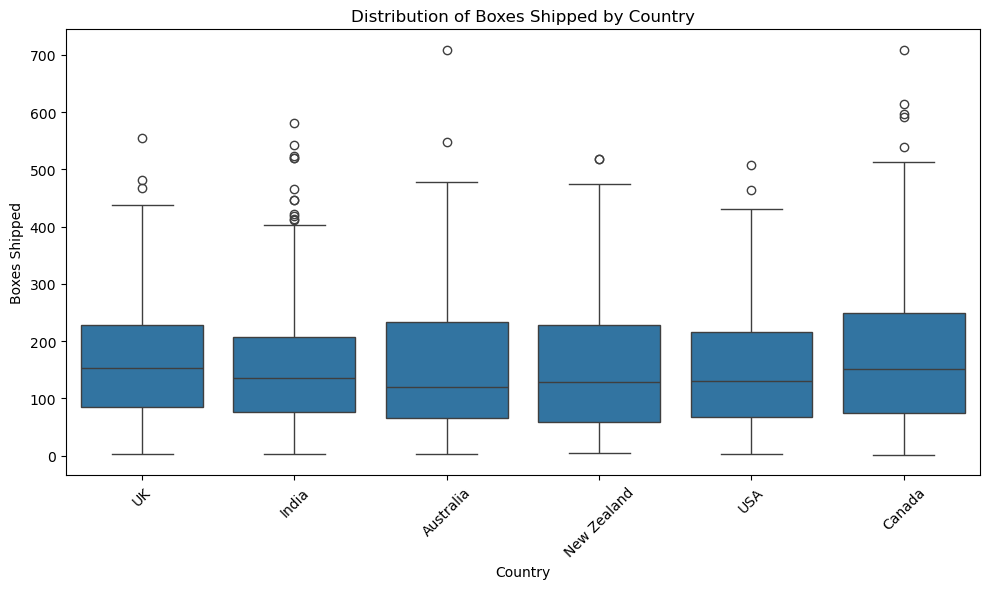

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Country', y='Boxes Shipped')
plt.title('Distribution of Boxes Shipped by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

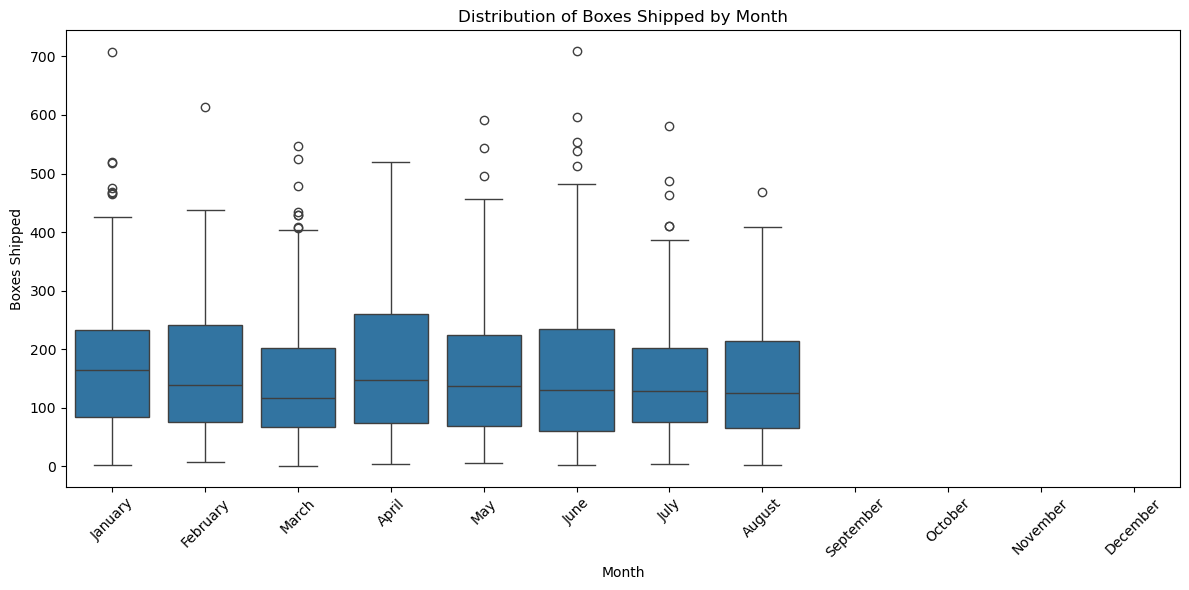

In [34]:
# Convert 'Date' to datetime and extract month
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Month'] = df['Date'].dt.month_name()  # Full month name (e.g., "January")

# Create a boxplot to compare boxes shipped by month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Boxes Shipped', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.title('Distribution of Boxes Shipped by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# Print section title
print("=== MISSING VALUES ANALYSIS ===")

# Step 1: Count total missing (null) values for each column in the DataFrame
missing_data = df.isnull().sum()

print(missing_data)

=== MISSING VALUES ANALYSIS ===
Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
Month            0
dtype: int64


In [36]:
# Step 2: Calculate the percentage of missing values per column
missing_percent = (missing_data / len(df)) * 100

# Step 3: Create a new DataFrame to summarize the count and percentage of missing values
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})

# Step 4: Print only the columns that have missing values, sorted by the count in descending order
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))


Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
 6   Month          1094 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 60.0+ KB


In [40]:
# Check for duplicates
df_duplicates = df.duplicated().sum()
df_duplicates

0

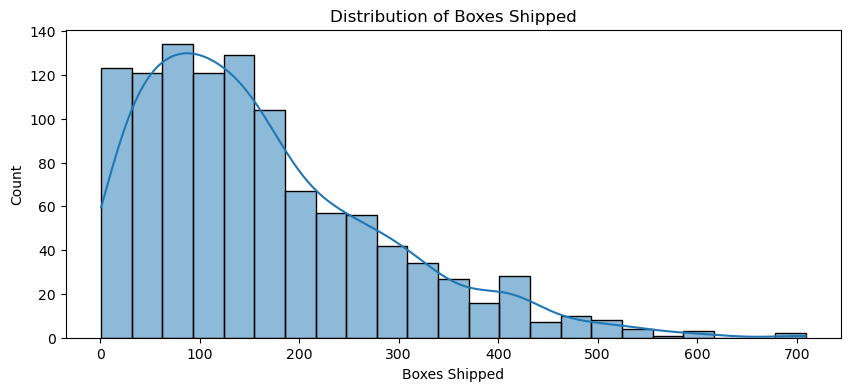

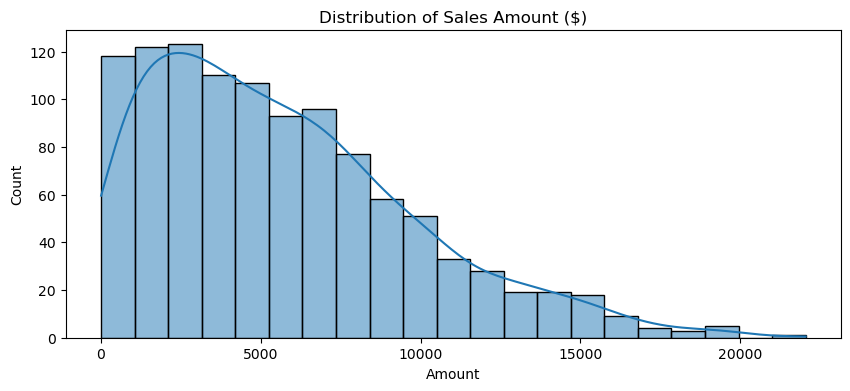

In [42]:
#Exploratory Data Analysis (EDA) for Sales Data

#Exploratory Data Analysis (EDA) helps us understand:

#The dataset's structure. 
#Identify patterns. 
#Detect anomalies.
#Generate insights. 
    
#Below is a step-by-step Python-based EDA

plt.figure(figsize=(10, 4))
sns.histplot(df['Boxes Shipped'], kde=True)
plt.title("Distribution of Boxes Shipped")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df['Amount'], kde=True)
plt.title("Distribution of Sales Amount ($)")
plt.show()

 #Univariate Analysis

#Numerical Variables (Boxes Shipped, Amount)

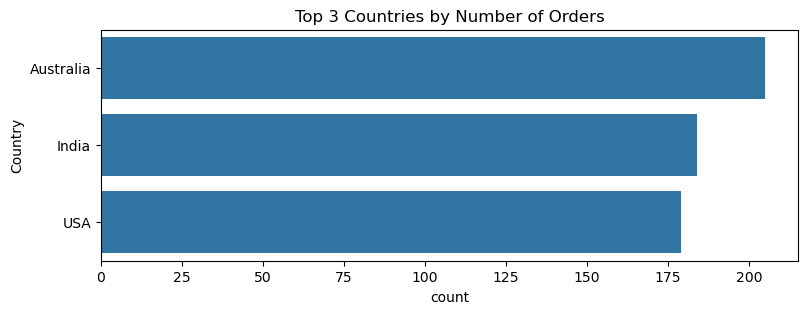

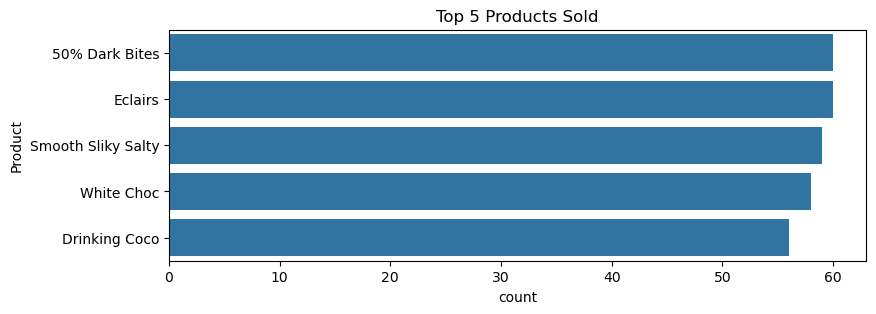

In [46]:
#Categorical Variables (Country, Product, Sales Person)

# Top 10 Countries by Sales
plt.figure(figsize=(9, 3))
sns.countplot(data=df, y='Country', order=df['Country'].value_counts().index[:3])
plt.title("Top 3 Countries by Number of Orders")
plt.show()

# Top 10 Products Sold
plt.figure(figsize=(9, 3))
sns.countplot(data=df, y='Product', order=df['Product'].value_counts().index[:5])
plt.title("Top 5 Products Sold")
plt.show()



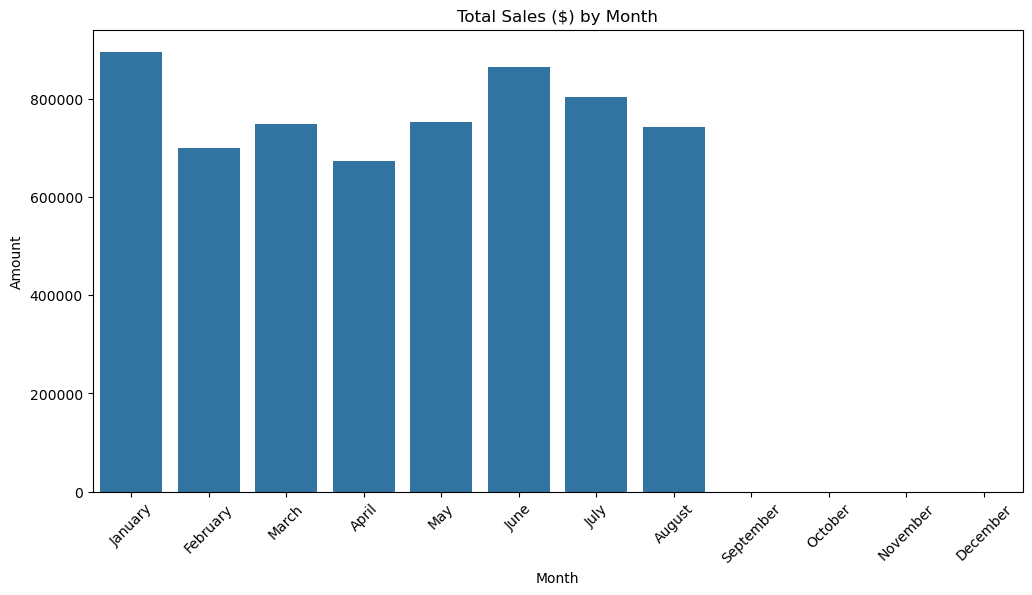

In [48]:
#Sales Amount vs. Month
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month', y='Amount', estimator='sum', ci=None, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.title("Total Sales ($) by Month")
plt.xticks(rotation=45)
plt.show()

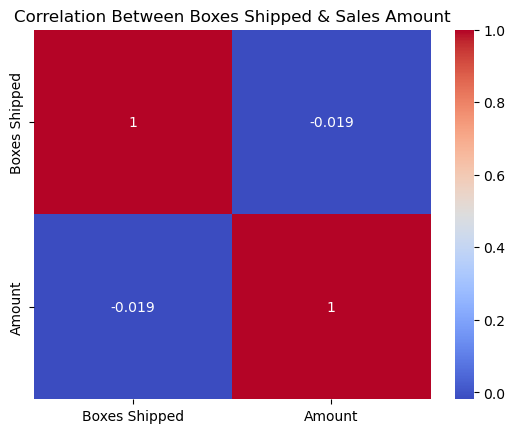

In [49]:
#Correlation Heatmap (Numerical Variables)

corr = df[['Boxes Shipped', 'Amount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Boxes Shipped & Sales Amount")
plt.show()

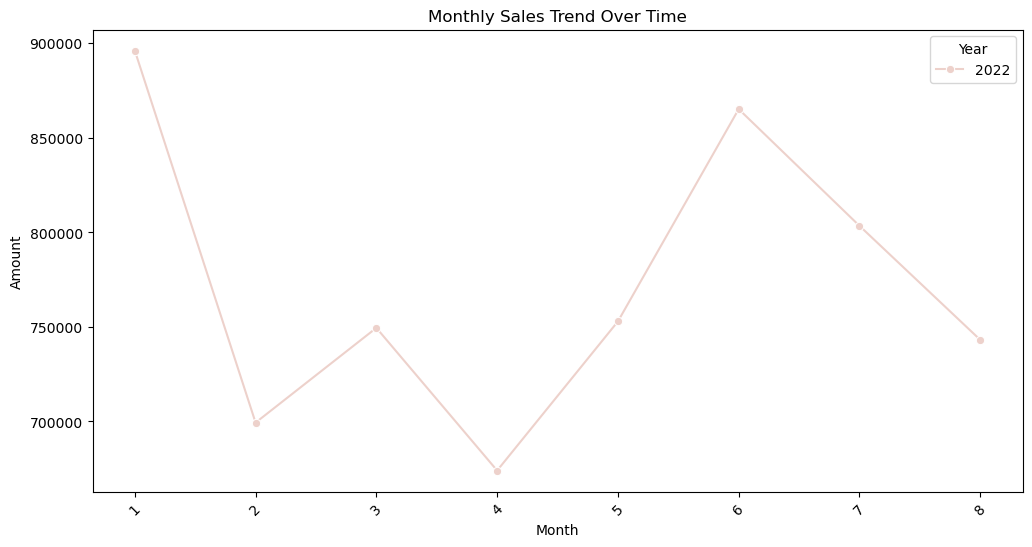

In [51]:
#Time Series Analysis
#Monthly Sales Trend

# First, make sure we have Year and Month columns
# If your date is in a column like 'Date' with datetime format, extract Year and Month
# Assuming df has a column 'Date' with datetime values
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Now proceed with the groupby operation
monthly_sales = df.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Amount', hue='Year', marker='o')
plt.title("Monthly Sales Trend Over Time")
plt.xticks(rotation=45)
plt.show()

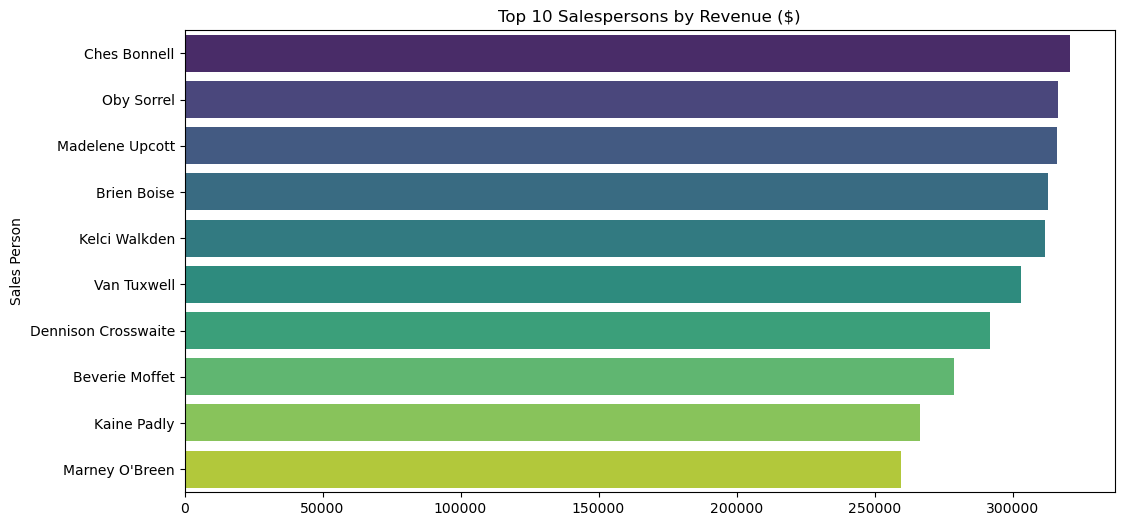

In [52]:
#Advanced Insights

#Top Salespersons by Revenue
top_salespersons = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_salespersons.values, y=top_salespersons.index, palette='viridis')
plt.title("Top 10 Salespersons by Revenue ($)")
plt.show()

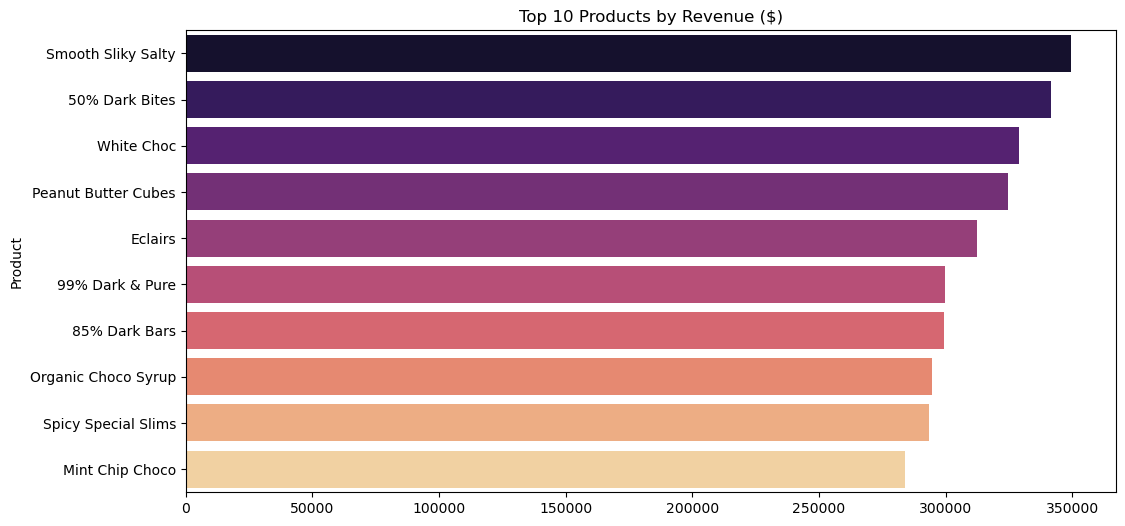

In [53]:
#Sales by Product Category

product_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='magma')
plt.title("Top 10 Products by Revenue ($)")
plt.show()